<a href="https://colab.research.google.com/github/EllenSakkla/Python/blob/main/projects/Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies project
---
The Movies project is focused on retrieving information about cinematography through an examination of the Movies database which includes an extensive set of entries including information about directors, film title, release year, as well as genre.


Creating a movies dataframe using SQL in Python
---
Pandas provide a function that will execute a query on a connected database and format the result into a dataframe

The query:
```
SELECT first_name, last_name, name, year, rank, genre FROM directors, movies, movies_genres, movies_directors WHERE movies.id = movies_directors.movie_id AND movies.id = movies_genres.movie_id AND directors.id = movies_directors.director_id
```
will:
*  SELECT the fields first_name FROM directors
*  SELECT the fields name, year, rank FROM movies
*  SELECT the field genre FROM movies_genres
*  WHERE the ids match in movies and movies_directors
*  AND the ids matchin movies and movies_genres
*  AND the ids match in directors and movies directors

The query below creates a dataframe from the output.  Using the `pd.read_sql_query` function to read this query into a pandas dataframe called **movies_df**

In [ ]:
# colab does not have mysql automatically installed, so you must run this code once to install it each time you reopen the colab document
!pip install mysql.connector

In [ ]:
import pandas as pd
from google.colab import files
import mysql.connector

def get_movies_data():
  mydb = mysql.connector.connect(
    host="relational.fit.cvut.cz",
    port="3306",
    user ="guest",
    password ="relational",
    database="imdb_ijs"
  )
  
  query = """
    SELECT first_name, last_name, name, year, genre 
    FROM directors, movies, movies_genres, movies_directors 
    WHERE movies.id = movies_directors.movie_id 
    AND movies.id = movies_genres.movie_id 
    AND directors.id = movies_directors.director_id
  """
  movies = pd.read_sql_query(query, mydb)
  movies. to_csv('movies.csv')
  files.download('movies.csv')
  return movies

# This code will test if the movies_df variable is a valid pandas dataframe 
movies_df = get_movies_data()
if isinstance(movies_df,pd.DataFrame):
  print("Test passed, variable is a pandas dataframe")
else:
  print("Test failed, not a pandas dataframe")

# This will show the first part of the dataframe
movies_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test passed, variable is a pandas dataframe


,first_name,last_name,name,year,genre
0,Les,12 Poissons,Rondo pour trompette,2002,Short
1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,Drama
2,Khairiya,A-Mansour,Churches in Iraq,1988,Documentary
3,Ricardo,A. Solla,"Foto, La",2001,Drama
4,Ricardo,A. Solla,"Foto, La",2001,Short


Movies Database
---
The Movies database csv copy for this project is available at: "https://raw.githubusercontent.com/EllenSakkla/Python/main/datasets/movies.csv"

### Inspect the dataset 
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/EllenSakkla/Python/main/datasets/movies.csv"
movies = pd.read_csv(url)
movies

,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short
...,...,...,...,...,...,...,...
368889,368889,Yusuf,Ünal,Kalbim agliyor,1988,NaN,Drama
368890,368890,Ahmet,Ündag,Ve gnese kan siradi,1972,NaN,Adventure
368891,368891,Idil,Üner,"Liebenden vom Hotel von Osman, Die",2001,8.5,Short
368892,368892,Yüksel,Ünsal,Evvel zaman iinde,1951,NaN,Animation


In [ ]:
def get_summary(movies):
  # merged code for the general info, the top 5 rows of the dataset, and the numerical summary
  return movies.info(), movies.head(), movies.describe(), movies.columns

get_summary(movies)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


(None,
    Unnamed: 0 first_name    last_name                      name  year  rank  \
 0           0        Les  12 Poissons      Rondo pour trompette  2002   NaN   
 1           1    Lejaren     a'Hiller  Sleep of Cyma Roget, The  1920   NaN   
 2           2   Khairiya    A-Mansour          Churches in Iraq  1988   NaN   
 3           3    Ricardo     A. Solla                  Foto, La  2001   NaN   
 4           4    Ricardo     A. Solla                  Foto, La  2001   NaN   
 
          genre  
 0        Short  
 1        Drama  
 2  Documentary  
 3        Drama  
 4        Short  ,
           Unnamed: 0           year           rank
 count  368894.000000  368894.000000  113376.000000
 mean   184446.500000    1969.442222       5.995124
 std    106490.669438      29.082051       1.540330
 min         0.000000    1888.000000       1.000000
 25%     92223.250000    1947.000000       5.100000
 50%    184446.500000    1976.000000       6.200000
 75%    276669.750000    1996.000000  

### Clean the dataset 
---


Ideas for cleaning the data
Remove the unnamed column as it is just an index that not needed.
Make sure that there are no spaces " " in the columns
Sort by genre or year.
Remove films with no ranking - to reduce the size.
Decided only rank needed to be cleaned up.

In [ ]:
movies_cleaned = movies.dropna()
movies_cleaned = movies.drop(columns = ['Unnamed: 0']) #or instead of using the title of the column > movies.drop(columns[0])
movies_cleaned.info()
#movies_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   first_name  368894 non-null  object 
 1   last_name   368894 non-null  object 
 2   name        368894 non-null  object 
 3   year        368894 non-null  int64  
 4   rank        113376 non-null  float64
 5   genre       368894 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 16.9+ MB


The above code was used to clean the database from null values and the indexing column for readability and faster processing which is appropriate taking into account the fact that the dataset is a large one with many thousands of entries.

In [ ]:
movies_dupli_cleaned = movies_cleaned.drop_duplicates()
movies_dupli_cleaned.info()
movies_dupli_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368893 entries, 0 to 368893
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   first_name  368893 non-null  object 
 1   last_name   368893 non-null  object 
 2   name        368893 non-null  object 
 3   year        368893 non-null  int64  
 4   rank        113376 non-null  float64
 5   genre       368893 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 19.7+ MB


,year,rank
count,368893.000000,113376.000000
mean,1969.442158,5.995124
std,29.082065,1.540330
min,1888.000000,1.000000
25%,1947.000000,5.100000
50%,1976.000000,6.200000
75%,1996.000000,7.100000
max,2007.000000,9.900000


After removing duplicates we can see in the info print section that the totals remain the same, which means that no duplicates were present in this database. Therefore, switching to the movies_cleaned dataset is valid.

### How many movies of each genre are there?
---

In [ ]:
genre_counts = movies["genre"].value_counts()
print(genre_counts)

Short          72894
Drama          72635
Comedy         54667
Documentary    35698
Animation      17038
Romance        13562
Action         12890
Crime          12610
Family         11074
Thriller       10681
Adventure       8598
Western         8231
Horror          7423
Musical         6843
Sci-Fi          4957
Mystery         4951
Fantasy         4871
Music           4444
War             4398
Film-Noir        429
Name: genre, dtype: int64


We can see from the counting of movies per genre that the top three genres are shorts, drama & comedy.

### Which director has the highest ranked movies?
---

In [ ]:
def highest_ranks():
  directors = movies
  directors["Top directors"] = movies["first_name"] + " " + movies["last_name"] 
  best_director = movies[movies['rank'] == 9.9].groupby('Top directors',)['rank'].count()
  return best_director

highest_ranks()

Top directors
Abel Gance              1
Andrew Cappelletti      2
András Salamon          1
Arünas Zebriünas        1
Ben Holmes              2
Benjamin Christensen    1
Carole Roussopoulos     5
Debs Tarrier            2
Fedor Hanzekovic        1
Georgi Daneliya         1
Gregg Zehentner         3
Ioana Wieder            2
Ishmael Bernal          1
Isidor Annensky         1
Ivanka Grybcheva        1
Jim Jarmusch            1
Jirí (I) Trnka          1
John Cassavetes         2
Jonathan Demme          2
Julio (I) Bracho        3
Kirsten Tretbar         1
Marcell Jankovics       1
Matthew Crandall        2
Satyen Bose             3
Scott Barkan            3
See-Yuen Ng             1
Sergei M. Eisenstein    1
Sergiu Nicolaescu       2
Vsevolod Pudovkin       1
William T. Hurtz        2
Zack Resnicoff          4
Name: rank, dtype: int64

We can see from the sorting of data above that Carole Roussopoulos has the highest ranked movies socre of 5.

### How many movies have ranks of over 9?
---


In [ ]:
top_ranks = movies_cleaned[movies_cleaned['rank'] > 9].count()
print(top_ranks)
print("The total number of movies with ranks over 9 are: ", top_ranks[0])

first_name    1483
last_name     1483
name          1483
year          1483
rank          1483
genre         1483
dtype: int64
The total number of movies with ranks over 9 are:  1483


### Plot a bar chart of mean rank and genre
---

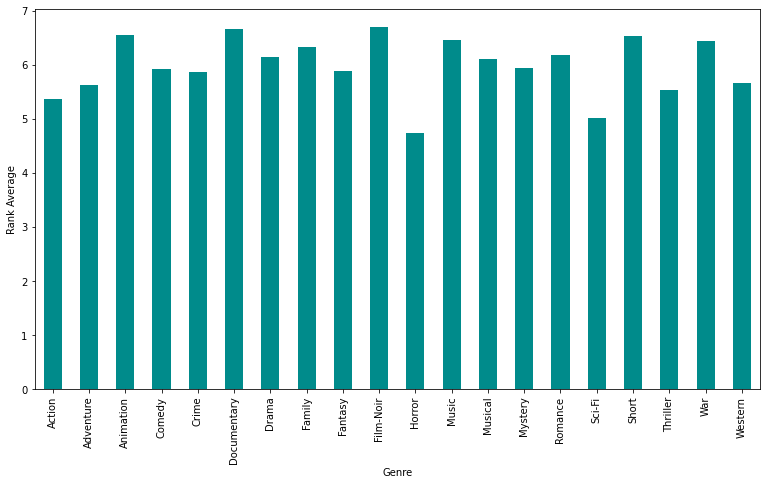

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/EllenSakkla/Python/main/datasets/movies.csv"
movies = pd.read_csv(url)

def bar_chart():
  movies_cleaned = movies.dropna()
  movies_cleaned = movies.drop(columns = ['Unnamed: 0']) 

  ranking = movies_cleaned.groupby('genre')['rank'].mean()
  plt.figure(figsize=(13,7))
  barchart = ranking.plot(x='genre', y='rank', kind='bar', color = 'darkcyan')
  barchart.set_xlabel("Genre")
  barchart.set_ylabel("Rank Average")
  plt.show()

bar_chart()

We can see in the bar chart above the extend to which shorts, drama and comedy are the predominant genres in comparison to other tyes of movies.

### Plot a pie chart of how many movies of each genre there are 
---


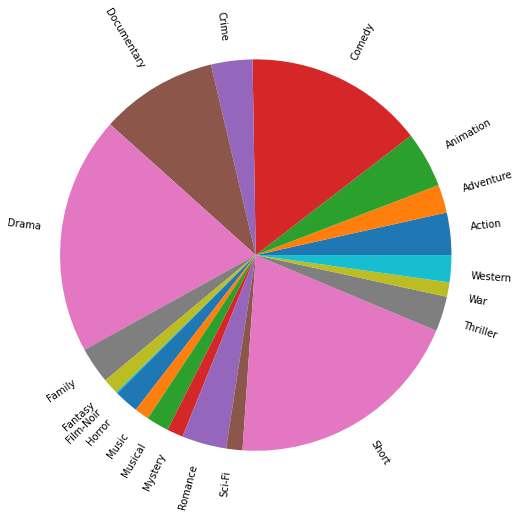

In [8]:
def pie_chart():

  movies_cleaned = movies.dropna()
  movies_cleaned = movies.drop(columns = ['Unnamed: 0'])

  genre_movies = movies_cleaned.groupby(['genre'])['name'].count()
  plt.figure(figsize=(15,9))
  labels = genre_movies.keys()
  plt.pie(genre_movies, labels = labels, rotatelabels = True)
  plt.show()

pie_chart()

The pie chart above is another visualisation method to demonstrate the extend to which shorts, drama and comedy are the predominant genres in comparison to other tyes of movies.

### Plot a graph showing the mean Rank for each year 

year
1888         NaN
1892    3.780000
1893    6.800000
1894    6.100000
1895    5.644444
          ...   
2003    6.207317
2004    6.216699
2005         NaN
2006         NaN
2007         NaN
Name: rank, Length: 117, dtype: float64


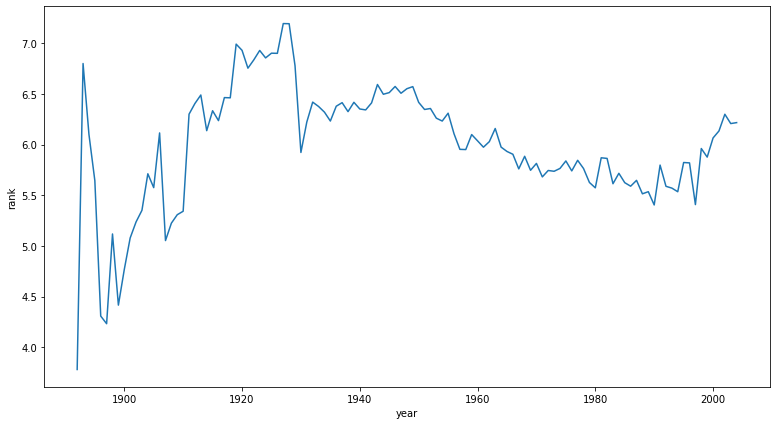

In [9]:
def line_plot():

  movies_cleaned = movies.dropna()
  movies_cleaned = movies.drop(columns = ['Unnamed: 0'])

  mean_rank = movies_cleaned.groupby('year')['rank'].mean()
  print(mean_rank)
  plt.figure(figsize=(13,7))
  chart = sns.lineplot(data=mean_rank)
  sns.set_style("whitegrid")

line_plot()

We can see in the lineplot above that between 1920 and 1930 there was an increase in the average ranking probably connected with the floorishing of the cinematic industry before the WW2 era.

# Reflection
----
The evolution of cinematography is brilliantly captured in the examination of the movies dataset in this project that originates from IMDb which is the world's most popular and authoritative source for movie, TV and celebrity content, hence a valueable source of all types of information about cinema. In terms of genres it is notable that directors like to make movies that are classified as drama and/or comedy.

**Skills demonstrated in this project**<br>
The skills that were included in this project were using SQL & Python for the initial quering of the data, followed by investigating, cleaning, describing, interrogating data. And lastly the visualisation of data interpretations in the form of a variety of chart types. 

Additionally, there has been a cross-evaluation of the original dataframe from the IMDb source included in the SQL data mining initial section, into the FutureCoders csv and then a personal copy from my drive, uploaded on GitHub (datasets folder) as the final version and data source for this project.

Challenges:
The complexity and risks involved with such large databases, as well as trying to implement graphs for the correct variables.